# Processing the data

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('gnpy_simulated_results-1.csv')
# df.head()

In [3]:
dataset = df.values
# dataset

In [4]:
# X1 = dataset[:,0]
# X2 = dataset[:,35:43]
X = df[['launch_power_dbm','Status_Ch1','Status_Ch2','Status_Ch3','Status_Ch4','Status_Ch5','Status_Ch6','Status_Ch7','Status_Ch8']]
X = X.values

In [5]:
# channel SNRs
Y = dataset[:,43:50]

In [6]:
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)

In [7]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [8]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6299, 9) (1350, 9) (1350, 9) (6299, 7) (1350, 7) (1350, 7)


# Building the ANN

In [9]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=9))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

In [10]:
# sgd = stochastic gradient descent
# loss function for outputs that take values 1 or 0 is called binary cross entropy
# want to track the accuracy on top of the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

In [11]:
# fit as we are fitting the parameters to the data
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=40, batch_size=32)

Train on 6299 samples, validate on 1350 samples
Epoch 1/40
6299/6299 [==============================] - 1s 177us/step - loss: 0.1028 - mean_squared_error: 0.1028 - mean_absolute_error: 0.2936 - val_loss: 0.0304 - val_mean_squared_error: 0.0304 - val_mean_absolute_error: 0.1466
Epoch 2/40
6299/6299 [==============================] - 0s 52us/step - loss: 0.0125 - mean_squared_error: 0.0125 - mean_absolute_error: 0.0876 - val_loss: 0.0054 - val_mean_squared_error: 0.0054 - val_mean_absolute_error: 0.0600
Epoch 3/40
6299/6299 [==============================] - 0s 51us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0455 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - val_mean_absolute_error: 0.0367
Epoch 4/40
6299/6299 [==============================] - 0s 51us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0331 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0294
Epoch 5/40
6299/6299 [=============

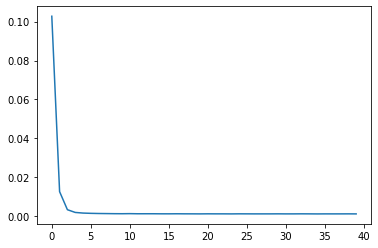

In [15]:
plt.plot(hist.history['mean_squared_error'])
plt.show()

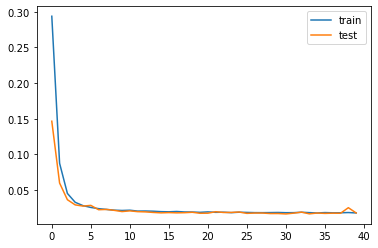

In [17]:
plt.plot(hist.history['mean_absolute_error'], label='train')
plt.plot(hist.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

In [14]:
train_mse = (model.evaluate(X_train, Y_train, verbose=1))[1]
test_mse = (model.evaluate(X_test, Y_test, verbose=1))[1]
print('MSE train: %.5f, MSE test: %.5f' % (train_mse, test_mse))

1350/1350 [==============================] - 0s 18us/step
MSE train: 0.00105, MSE test: 0.00093
